In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as n
import torch.nn.functional as f
import os
import skimage.io as io
from skimage.transform import rotate,AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
import glob
import tqdm
# Any results you write to the current directory are saved as output.

In [5]:
files=glob.glob("../input/dogs-cats-images/dataset/training_set/dogs/*")

In [10]:
images=[io.imread(i).shape for i in files]

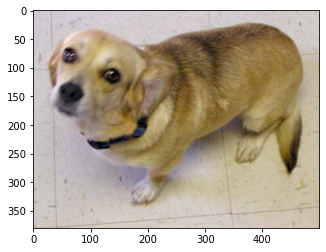

In [13]:
#Reading image 
image=io.imread(files[0])
plt.imshow(image)

In [18]:
#Rotating an image
rotated=rotate(image,angle=45,mode='wrap')

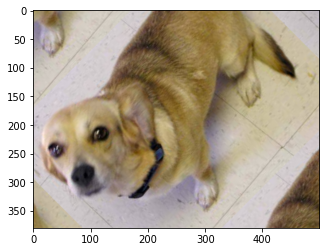

In [19]:
plt.imshow(rotated)

In [16]:
rotated=rotate(image,angle=100,mode='wrap')

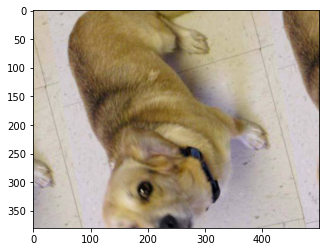

In [17]:
plt.imshow(rotated)

In [22]:
#Image is getting cut off
rotated=rotate(image,angle=100,resize=True)

In [23]:
image.shape

(380, 500, 3)

In [24]:
rotated.shape

(558, 461, 3)

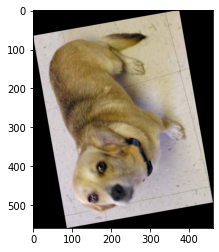

In [25]:
plt.imshow(rotated)

In [29]:
# Affine Transform ax+by+c implies we are rotating as well as streching the line and translating together
# imagine coordinate system
translated=AffineTransform(translation=(25,25)) #defines a matrix


In [32]:
wrapshift=warp(image,translated,mode="wrap")

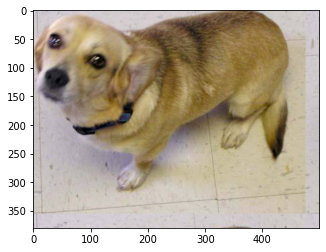

In [33]:
plt.imshow(wrapshift)

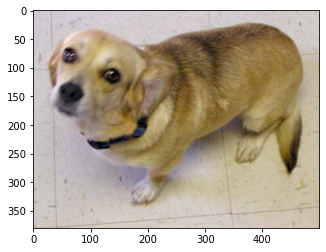

In [34]:
plt.imshow(image)

In [35]:
translated=AffineTransform(translation=(-50,-50))

In [38]:
translatedimage=warp(image,translated,mode="wrap")

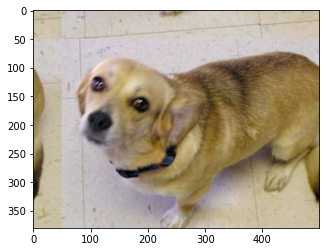

In [39]:
plt.imshow(translatedimage)

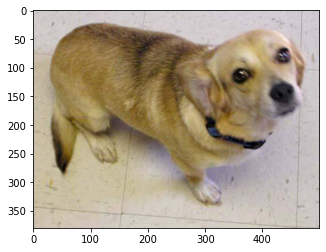

In [40]:
#Flipping image L-R
flipimg=np.fliplr(image)
plt.imshow(flipimg)

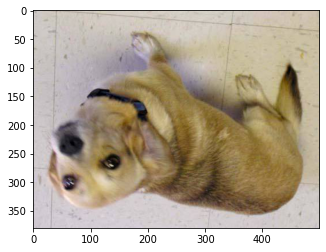

In [41]:
#flipupside down
flipud=np.flipud(image)
plt.imshow(flipud)

In [42]:
# Adding Noise to images
# Adding noise is robust technique as it allows model to filter noise from image
sigma=0.100
noiseimage=random_noise(image,var=sigma)

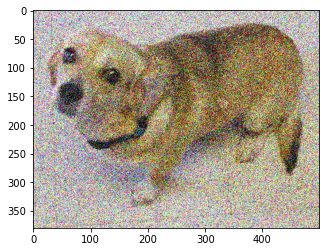

In [43]:
plt.imshow(noiseimage)

In [49]:
#blurring removes bias of quality of images between training and testdataset
blurred=gaussian(image,sigma=1,multichannel=True)

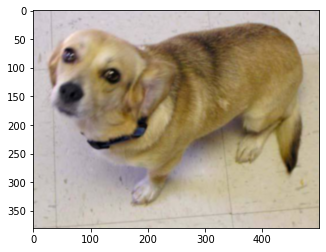

In [50]:
plt.imshow(blurred)

In [52]:
import skimage.io as io
from skimage.transform import rotate,AffineTransform,warp
from skimage.filters import gaussian
from skimage.util import random_noise
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [53]:
from torch.optim import Adam,SGD

In [54]:
torch.manual_seed(0)


In [90]:
class net(n.Module):
    def __init__(self):
        super().__init__()
        self.cnnlayers=n.Sequential(n.Conv2d(3,32,kernel_size=3,stride=1,padding=1),n.ReLU(inplace=True),
                                    n.BatchNorm2d(32),n.MaxPool2d(kernel_size=2,stride=2),
                                    n.Dropout(0.25),n.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
                                    n.ReLU(inplace=True),n.BatchNorm2d(64),n.MaxPool2d(kernel_size=2,stride=2),
                                    n.Dropout(0.25),n.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                                    n.ReLU(inplace=True),n.BatchNorm2d(128),n.MaxPool2d(kernel_size=2,stride=2),
                                    n.Dropout(0.25))
        
        dim1=self.outshape()
        
        self.lnlayer=n.Sequential(n.Linear(dim1,512),n.ReLU(inplace=True),n.Dropout(0.25),
                                  n.Linear(512,256),n.ReLU(inplace=True),n.Dropout(0.25),
                                  n.Linear(256,2))
        
    
    def forward(self,x):
        out=self.cnnlayers(x)
        out=n.Flatten(start_dim=1,end_dim=-1)(out)
        out=self.lnlayer(out)
        return out
    
    def outshape(self):
        x=torch.zeros((1,3,224,224))
        out=self.cnnlayers(x)
        out=n.Flatten(start_dim=1,end_dim=-1)(out)

        return out.shape[1]

In [91]:
model=net()

In [93]:
x1=torch.zeros((2,3,224,224))

In [94]:
model.forward(x1)

tensor([[-0.0200,  0.0402],
        [-0.0275,  0.0324]], grad_fn=<AddmmBackward>)

In [ ]:
n.A